# Optimize with SciPy

Say hello to [SciPy](https://www.scipy.org/), an powerfull library for mathematics in Python

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## 1. Minimize

In our previous exercice, we saw the importance of finding the minimum of a given function - for instance, `RMSE = f(intercept_coef, slope_coef)`, and the two main approaches possible: iterative approaches (such as gradient descent) and closed-formed (such as matrix inversion).

Let's use the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) library to do that in a few line of code!

In [1]:
# Import optimize

### 1.1 1D-function

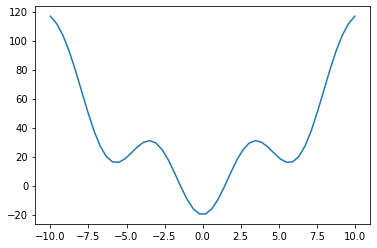

In [4]:
# Suppose a given function f
def f(x):
    return (x**2 - 20 * np.cos(x))

x = np.linspace(-10,10,50)
plt.plot(x, f(x))

In [ ]:
# find the local minimum of f, from a starting point xO


❓ Notice the minimum found in variable `x`, and the number of iterations it took to converge: `nint`. What can you conclude? Try to changing the `x0`!

<details>
    <summary>👉 Solution</summary>
The algorithm of the <code>minimize()</code> function get stuck on a local minimum, except when starting from values of x0 close enough to the global minimum (0)
    
In math, we say that this function is not [convex](https://en.wikipedia.org/wiki/Convex_function). If it were convex, any minimum would be the global minimum! In fact, machine-learning loves convexity, and such problems are very easy to solve with iterative processes such as gradient descent.
</details>


### 1.2 2D-function

As we saw in previous exercice, finding the minimum of a function with more than one parameters becomes rapidly complex. Let's try out:

In [6]:
def g(X):
    return np.sin(X[0]**2 + X[1]**2)

In [ ]:
# find the local minimum of g, from a starting point X0


❓Is this the absolute minimum?

<details>
    <summary>💡Hint</summary>
Try this out to plot the function
<pre>
x = np.linspace(-5,5,100) # shape(100,1)
y = np.linspace(-5,5,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(res.x[0], res.x[1], c='r')
</pre>
</details>

### 1.3 Minimize under constraint 🔥

In real world problem, we often want to minimize a function $f(\textbf{x})$, **given a set of constraints on the values of $\textbf{x}$ itself**.  


For instance, let's say want to minimize 

$f(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Given the following constraints


$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*equality constraint*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*inequality constraint*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*bounds*)


Doesn't look easy? We will use the same `optimize.minimize` method with additional arguments as follows: 

`optimize.minimize(f, X0, constraints=cons, bounds=boundaries)`

In [8]:
# Define your objective function f(X) that you want to minimize, X being a ndarray 


Let's build our constraints:

In [289]:
# Define a function constraint1(X) that returns 0 iif equation [2] is True


# Define a function constraint2(X) that returns a number that is always <= 0 iif equation [2] is True


In [290]:
# We'll now define the "constraint" argument needed for minimize function


In [291]:
# Let's deal with equation [3].
# We could write them in the form of 10 constraints function, but it would be long
# Instead, lets create the boudaries arguments in the following form
# boundaries= tuple of tuple ((x1_min, x_1_max), (x2_min, x_2_max), ....)



In [ ]:
# Finally, define a starting point X0 for the minimization algorithm


❓ Now, try to find the minimum of your objective function `f` under such constraints using `optimize.minimize`

In [ ]:
# Minimize under constraints


🤔 Easy? Not so fast. As illustrated previously, you found a **local** minimal to your objective function f, given a starting point X0. Nothing proves that this is a global minimum. Can you think of a procedure that would increase your chance of finding the **global** minima?

<details>
    <summary>💡Hints</summary>

👉 One empirical idea is to loop over lots of random starting points X0, and store the minimum value found at each run. After each iteration, you increase your chance of having found the global minimum (if there is any).

💪 A more robust idea is to try to prove mathematically that your optimization problem is geometrically [convex](https://en.wikipedia.org/wiki/Convex_function). An optimization problem is convex if (i) its objective function f is a convex function, (ii) the inequality constraints are convex, and (iii) the equality constraints are
affine. Read in this excellent math-based presentation from Berkely: [Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)
</details>

In [1]:
# write your answer here in plain english text (no need to code)


👍 Congratulation for solving your first optimization under constraint problem.

As often in Data Science, the hard part is not the computation itself, but the **problem statement** - i.e. turning a problem into equations.

As optional exercice, feel free to try to write down equations and solve the famous [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem): You are given a backpack that can carry at best 20kg, and a set of items 20 items that each have a given value and weight (pick your own values). How could you maximise the total value of your backpack, given the constraint that the sum of all items does not exceed 20kg?

## 2. Fit a scatter plot

We often have to fit a scatterplot with a straght line, but it can also happen to look like something else (polynomial, logarithmic etc...)

Consider the dataset below: would you try to fit a linear regression curve to it?

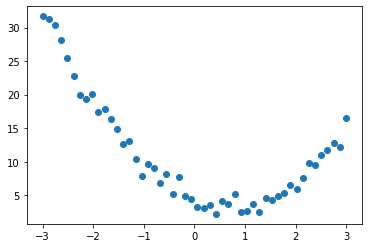

In [16]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

A polynomial estimator of degree 2 seems more appropriate in this case

In [17]:
# define the function f of degree two with parameters (a,b,c)
def f(x,a,b,c):
    # INSERT YOUR CODE
    

Yo find the best params (a,b,c), we could again reuse `optimize.minimize` method to minimizes the mean square error between our estimator $f$ and our scatter plot...

Fortunately, the handy method [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) does just that in one line

In [ ]:
# YOUR CODE HERE


The first array contains coefs that have been computed to minimize square errors between $f$ and the dataset  .
The second array contains the matrice of covariance.

❓Plot your quadratic estimator on top of the scatter plot to check that it fit!

In [ ]:
# YOUR CODE HERE


## 3. Interpolate

As with any spreadsheet softwares, we often want to quickly fill the blank in a series of datapoint. We'll use [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [7]:
from scipy import interpolate

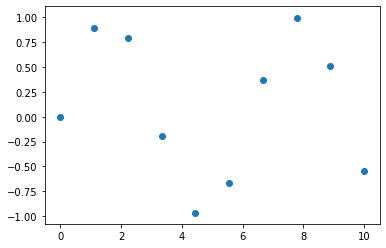

In [5]:
# Let's consider the following scatterplot
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

We can use the `interpolate.interp1d()` method to create a continuous function for any value x in this range

In [ ]:
# YOUR CODE HERE


You can now call your interpolated function with any continuous values for x in the initial range. Vizualize it with a new plot and more dense `linspace`for x. Feel free to try other `kind` of interpolation such as `quadratic` or `cubic`

In [ ]:
# YOUR PLOT HERE
